In [ ]:
pip install konlpy

In [ ]:
import matplotlib as mpl   # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
### 나눔 고딕 설치
!apt-get update -qq    # 설치를 업데이트를 할텐데, -qq 로그를 최소한으로
!apt-get install fonts-nanum*  -qq

In [ ]:
# !ls -ltr /usr/share/fonts/truetype
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 글꼴
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
from gensim import corpora
from gensim import models

In [ ]:
documents=[
  '나는 아침에 라면을 자주 먹는다. 그리고 아침에 우유도 먹는다.',
  '나는 아침에 밥 대신에 라면을 자주 먹는다. 아침에 라면을 먹으면 속이 아프다.',
  '현대인의 삶에서 스마트폰은 필수품이 되었다.',
  '현대인들 중에서 스마트폰을 사용하지 않는 사람은 거의 없다. ',
  '점심시간에 스마트폰을 이용해 영어 회화 공부를 하느라 혼자 밥을 먹는다.'
]

In [ ]:
stoplist = ('.','!', '?')  # 불용어 리스트 
doc1 = '나는 아침에 라면을 자주 먹는다 .'

# print(doc1.split())
tex_list = []
for word in doc1.split():
  if word not in stoplist:
    tex_list.append(word)
tex_list

['나는', '아침에', '라면을', '자주', '먹는다']

In [ ]:
stoplist = ('.','!', '?', '그리고', '않는')  # 불용어 리스트 

# 단어 리스트 만들기 
texts = [
         [word for word in document.split() if word not in stoplist]  for document in documents
        ]
texts

[['나는', '아침에', '라면을', '자주', '먹는다.', '아침에', '우유도', '먹는다.'],
 ['나는',
  '아침에',
  '밥',
  '대신에',
  '라면을',
  '자주',
  '먹는다.',
  '아침에',
  '라면을',
  '먹으면',
  '속이',
  '아프다.'],
 ['현대인의', '삶에서', '스마트폰은', '필수품이', '되었다.'],
 ['현대인들', '중에서', '스마트폰을', '사용하지', '사람은', '거의', '없다.'],
 ['점심시간에', '스마트폰을', '이용해', '영어', '회화', '공부를', '하느라', '혼자', '밥을', '먹는다.']]

In [ ]:
dictionary = corpora.Dictionary(texts)
print(type(dictionary) , list(dictionary) )

<class 'gensim.corpora.dictionary.Dictionary'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
# 코퍼스 만들기(벡터화)
# doc2bow()는 유닉크한 결과에서 단어의 출연횟수를 계산.
# 문서마다 단어ID와 그 발생빈도를 갖는 튜플.

corpus = [dictionary.doc2bow(text) for text in texts]
print(type(corpus), 'corpus : {}'.format(corpus))

<class 'list'> corpus : [[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)], [(0, 1), (1, 2), (2, 1), (3, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(2, 1), (19, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]]


In [ ]:
lda = models.ldamodel.LdaModel( corpus=corpus,
                                id2word=dictionary,
                                num_topics=2,
                                random_state = 1)

print(type(lda))

<class 'gensim.models.ldamodel.LdaModel'>


In [ ]:
# def show_topics(num_topics=10, num_words=10, log=False, formatted=True)
lda.show_topics()

[(0,
  '0.050*"삶에서" + 0.050*"스마트폰은" + 0.049*"필수품이" + 0.049*"현대인의" + 0.048*"되었다." + 0.041*"스마트폰을" + 0.039*"먹는다." + 0.037*"점심시간에" + 0.035*"회화" + 0.034*"하느라"'),
 (1,
  '0.091*"아침에" + 0.085*"먹는다." + 0.071*"라면을" + 0.051*"자주" + 0.050*"나는" + 0.041*"스마트폰을" + 0.031*"먹으면" + 0.031*"속이" + 0.031*"아프다." + 0.031*"대신에"')]

In [ ]:
print( lda.num_terms )     ## 용어의 수
print( lda.get_topics() )  ## topic별 단어별 비율

31
[[0.02566965 0.02583209 0.03938891 0.02796377 0.02393462 0.02337596
  0.02114931 0.0201587  0.02215989 0.02078477 0.02086268 0.0478454
  0.05026899 0.05009093 0.04934834 0.04869394 0.02864416 0.02911328
  0.02777909 0.04090814 0.02630373 0.02947131 0.02928422 0.03304752
  0.0339042  0.0335977  0.03235846 0.03657803 0.03408597 0.03231842
  0.03507788]
 [0.04970882 0.07096511 0.08474293 0.09112191 0.02933056 0.05098946
  0.03088568 0.03143876 0.03032144 0.03108921 0.03104571 0.01598046
  0.01462729 0.01472671 0.01514132 0.01550669 0.02670108 0.02643916
  0.02718408 0.04120072 0.02800781 0.02623926 0.02634371 0.02424255
  0.02376424 0.02393537 0.02462728 0.02227136 0.02366275 0.02464963
  0.02310894]]


In [ ]:
corpus = [text for text in texts]
corpus[:1]

[['나는', '아침에', '라면을', '자주', '먹는다.', '아침에', '우유도', '먹는다.']]

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

In [ ]:
wc = WordCloud(background_color='white',
               max_words=200,
               contour_width=3,
               contour_color='steelblue', 
               font_path=path)

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


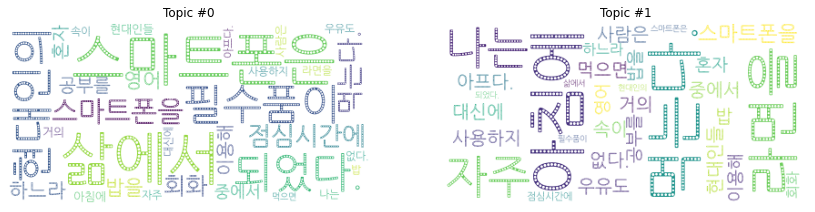

In [ ]:
fig = plt.figure(figsize=(30,30))

for t in range(lda.num_topics):
  plt.subplot(5,4,t+1)
  x = dict(lda.show_topic(t,200))    # 주제별 200개의 단어 보기
  im = wc.generate_from_frequencies(x)
  plt.imshow(im)
  plt.axis("off")
  plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)